In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
df["date_added"] = df["date_added"].str.strip()

In [ ]:
import pandas as pd
df["year_added"] = pd.to_datetime(df["date_added"]).dt.year

In [ ]:
df["month_added"] = pd.to_datetime(df["date_added"]).dt.month

In [ ]:
df["day_added"] = pd.to_datetime(df["date_added"]).dt.day_name()

In [ ]:
df["month_name"] = pd.to_datetime(df["year_added"]).dt.month_name()

In [ ]:
dt_ty =df["type"].value_counts()
dt_ty

,count
type,
Movie,6131
TV Show,2676


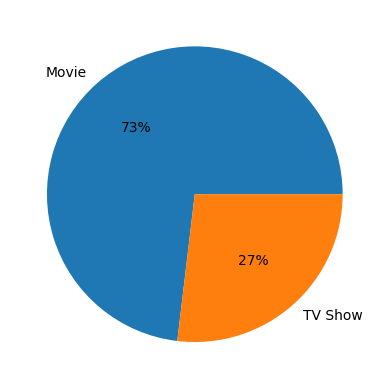

In [ ]:
dt_ty =df["type"].value_counts()
dt_ty

import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(dt_ty,
        labels = dt_ty.index,
        autopct = "%.f%%"
      )
plt.show()


# **Insights:**  

From the above information and pie chart we can conclude that there are 6131 movies as 73% in the whole data and 2676 TV Shows as 27% . Movies are dominating on the Netflix platform when comparing to the TV Show which are emerging newly.

In [ ]:
df.duplicated().value_counts()

,count
False,8807


In [ ]:
df_ty2=df.isnull().sum()
df_ty2

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
for i in df.columns:
    null_rate = df[i].isnull().sum()/df.shape[0] * 100
    if null_rate > 0:
        print(f"{i}'s null rate : {round(null_rate,2)}%")

director's null rate : 29.91%
cast's null rate : 9.37%
country's null rate : 9.44%
date_added's null rate : 0.11%
rating's null rate : 0.05%
duration's null rate : 0.03%
year_added's null rate : 0.11%
month_added's null rate : 0.11%
day_added's null rate : 0.11%
month_name's null rate : 0.11%


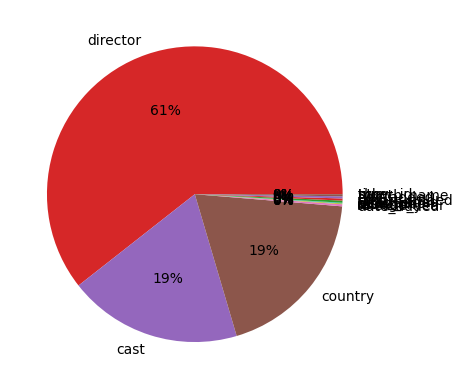

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df_ty2,
        labels = df_ty2.index,
        autopct = "%.f%%"
      )
plt.show()

In [ ]:
df["director"].fillna("Unknown_director",inplace=True)
df["cast"].fillna("Unknown_cast",inplace=True)
df["country"].fillna("Unknown_country",inplace=True)
df["date_added"].fillna("Unknown_date",inplace=True)
df["rating"].fillna("Unknown_rating",inplace=True)
df["duration"].fillna("Unkown_duration",inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
df["director"] = df["director"].str.split(", ")
df["cast"] = df["cast"].str.split(", ")
df["country"] = df["country"].str.split(", ")

df = df.explode(['director'])
df = df.explode(['cast'])
df = df.explode(['country'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,January
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,January
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,January
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,January
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,January


In [ ]:
df["type"].value_counts()


,count
type,
Movie,6131
TV Show,2676


In [ ]:
df_movies=df[df["type"] == "Movie"]
df_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,January
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown_country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021.0,9.0,Friday,January
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,Friday,January
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,Friday,January
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016.0,3.0,Wednesday,January
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,Wednesday,January
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,Friday,January
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,Saturday,January


In [ ]:
df_movies.shape

(6131, 16)

In [ ]:
df_shows = df[df["type"] == "TV Show" ]
df_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,January
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,January
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,January
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,January
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown_country,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown_director,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,5.0,Tuesday,January
8796,s8797,TV Show,Yunus Emre,Unknown_director,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,1.0,Tuesday,January
8797,s8798,TV Show,Zak Storm,Unknown_director,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,Thursday,January
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown_director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,Thursday,January


In [ ]:
df_shows.shape

(2676, 16)

In [ ]:
x_bar = df_movies.groupby("country")["title"].count().sort_values(ascending=False).index[:10]
x_bar

Index(['United States', 'India', 'Unknown_country', 'United Kingdom', 'Canada',
       'Spain', 'Egypt', 'Nigeria', 'Indonesia', 'Japan'],
      dtype='object', name='country')

In [ ]:
y_bar = df_movies.groupby("country")["title"].count().sort_values(ascending=False).values[:10]
y_bar

array([2058,  893,  440,  206,  122,   97,   92,   86,   77,   76])

In [ ]:
x_bar = df_shows.groupby("country")["title"].count().sort_values(ascending=False).index[:10]
x_bar

Index(['United States', 'Unknown_country', 'United Kingdom', 'Japan',
       'South Korea', 'India', 'Taiwan', 'Canada', 'France', 'Spain'],
      dtype='object', name='country')

In [ ]:
y_bar = df_movies.groupby("country")["title"].count().sort_values(ascending=False).values[:10]
y_bar

array([2058,  893,  440,  206,  122,   97,   92,   86,   77,   76])

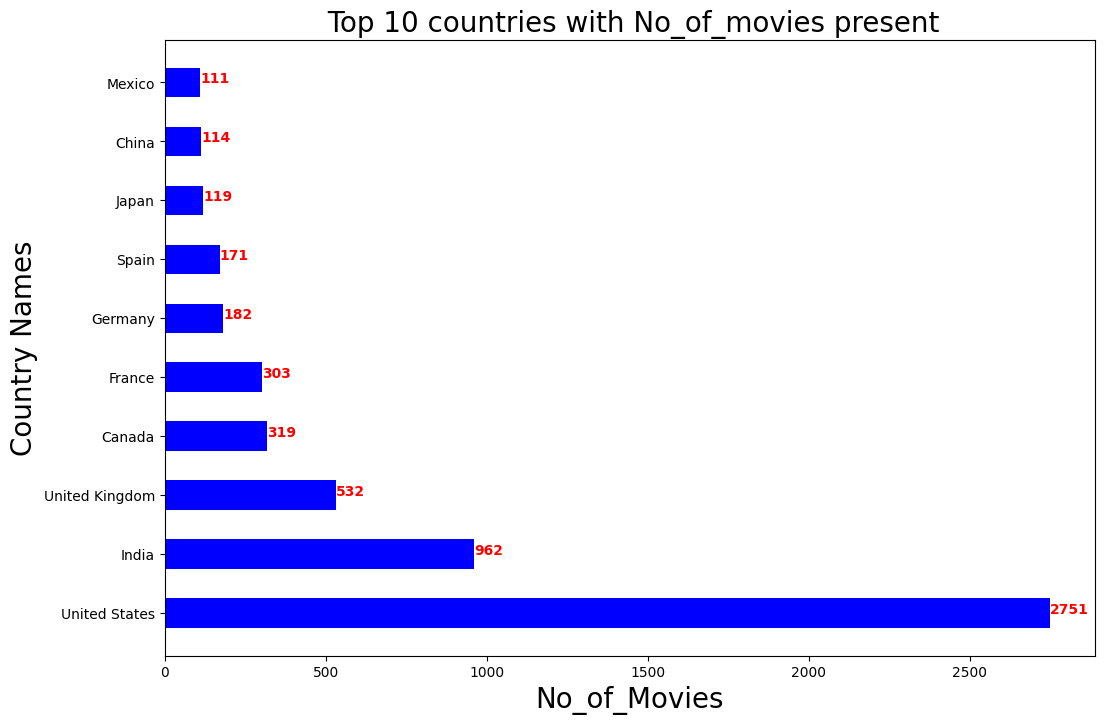

In [ ]:
x =  df_movie1.index
y =  df_movie1.values

fig,ax=plt.subplots(figsize = (12,8))
width = 0.50

ax.barh(x,y,width,color="blue")
plt.title(" Top 10 countries with No_of_movies present",fontsize = (20))
plt.ylabel("Country Names",fontsize = (20))
plt.xlabel("No_of_Movies",fontsize = (20))

for i,v in enumerate(y):
  ax.text(v,i,str(v),color='red',fontweight = "bold")

plt.show()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,January
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,January
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[Unknown_country],"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,January
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,[Unknown_country],"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,January
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,January


In [ ]:
df_sub_movies = df_movies.groupby("release_year")["title"].count().sort_values(ascending=False)[:20].reset_index()
df_sub_movies

,release_year,title
0,2018,767
1,2017,767
2,2016,658
3,2019,633
4,2020,517
5,2015,398
6,2021,277
7,2014,264
8,2013,225
9,2012,173


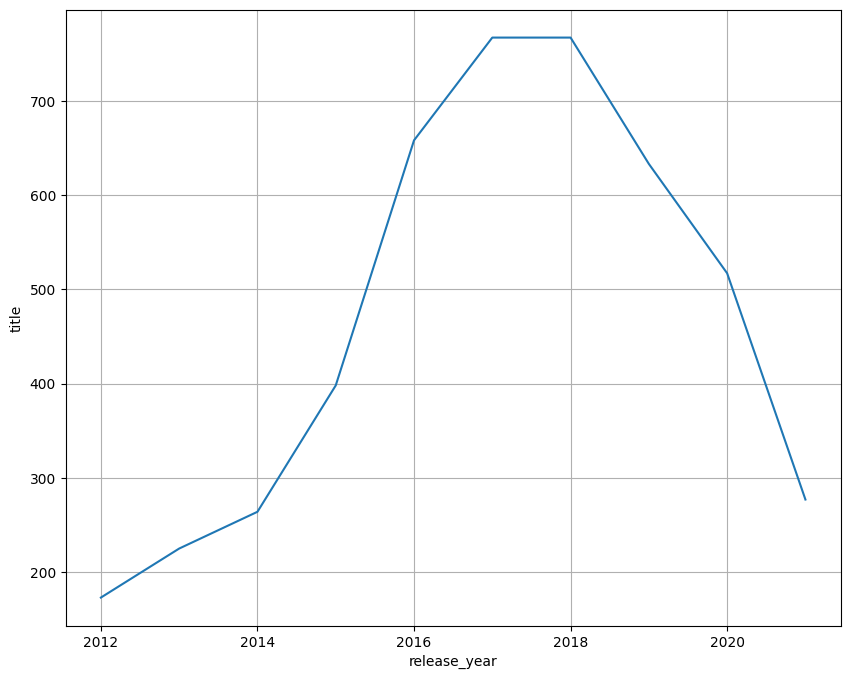

In [ ]:
df_sub_movies = df_movies.groupby("release_year")["title"].count().sort_values(ascending=False)[:10].reset_index()
df_sub_movies

plt.figure(figsize = (10,8))
sns.lineplot(x="release_year",y="title",data=df_sub_movies)
plt.grid()
plt.show()


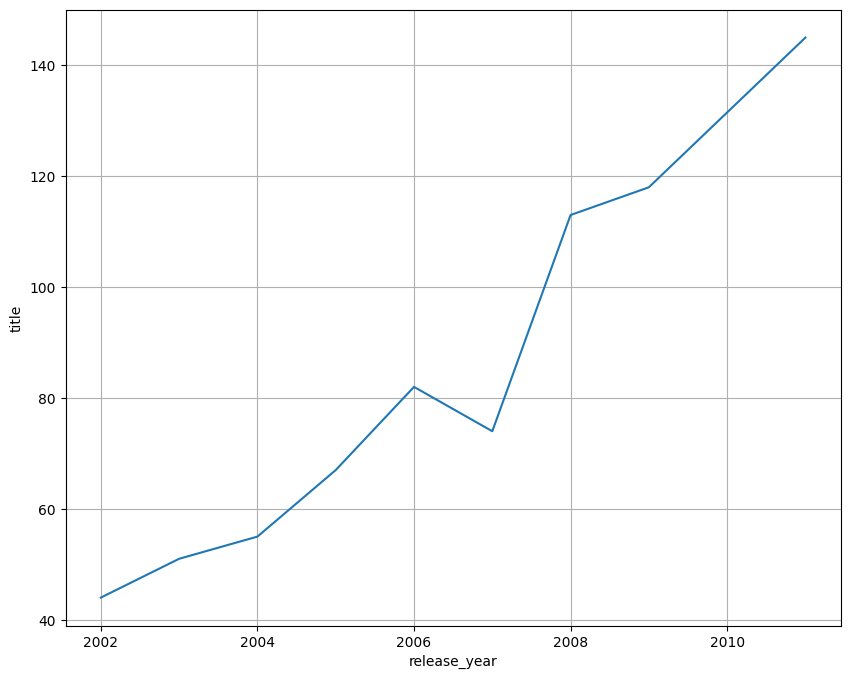

In [ ]:
df_sub_movies = df_movies.groupby("release_year")["title"].count().sort_values(ascending=False)[11:20].reset_index()
df_sub_movies

plt.figure(figsize = (10,8))
sns.lineplot(x="release_year",y="title",data=df_sub_movies)
plt.grid()
plt.show()

In [ ]:
df_sub_movies["title"].argmax()

0

In [ ]:
df_sub_movies.iloc[0].release_year, df_sub_movies.iloc[0].title

(2018, 767)

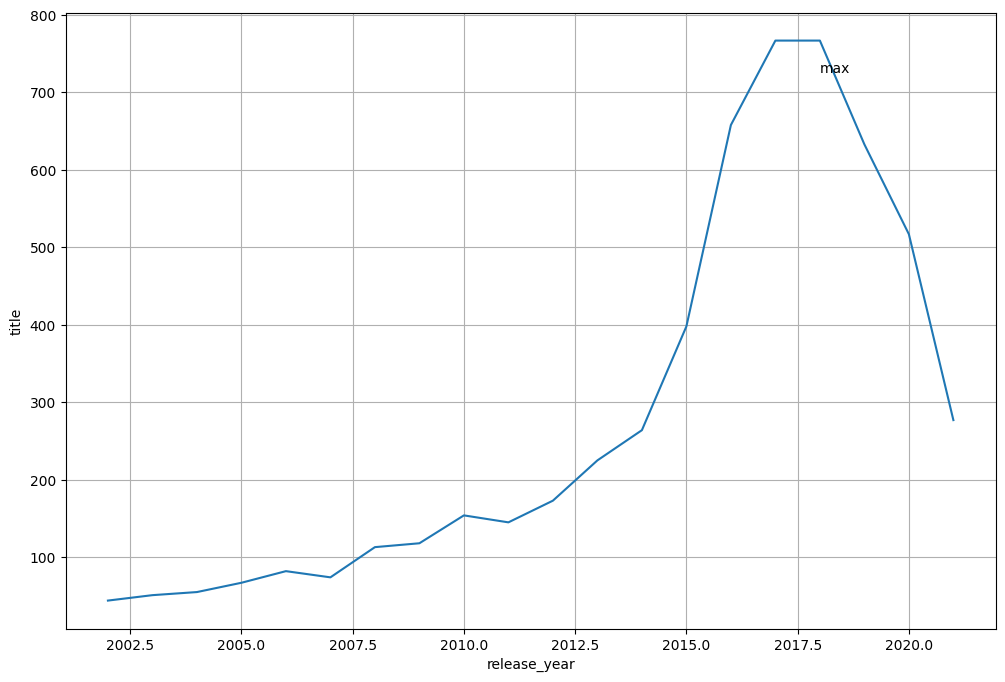

In [ ]:
plt.figure(figsize = (12,8))

plt.text(2018,726,"max")
sns.lineplot(x="release_year",y="title",data=df_sub_movies)
plt.grid()
plt.show()

# **Insights: **

By observing the above data we can conclude that in 2018 and 2017 years 767 movies were released in each year followed by 2016 and 2019 years with above 600 movies were released. By comparing with last 20 years there was a tremendous increase in movies releases, if we observe the line plot we can notice that in between 2015 to 2016 almost double number of movies were released in 2016 when comparing to 2015 there are so many reasons for this rise in movies. Because Netflix is an OTT platform which depends on internet data in between 2015 to 2016 internet boom happened in India Jio has been launched in 2016 with low internet data. This created a tremendous change in Digital services this is also one reasons. If internet data is cheaply available everyone can afford it also led to increase in memberships on Netflix platform many people started watching movies and TV-shows on Netflix with minimal internet charges. After 2018 is started decreasing if we observe in 2019 and 2020 there the graph is decreasing one of the reasons is due to covid-19 affect and increasing the internet data charges and membership prices.


# Recommendations: **bold text**

 Lowering the membership prices can increase the customers. Netflix also focus on marketing which can create a big difference in sales on online platforms. It should also focus on investing on best IMBD rating movies and TV-shows instead of least ratings. Discounts can play a vital role in increasing memberships on particular year or monthly subscriptions providing discounts and yearly subscriptions help in increase in memberships.


In [ ]:
df_sub_shows =df_shows.groupby("release_year")["title"].count().sort_values(ascending=False)[:20].reset_index()
df_sub_shows

,release_year,title
0,2020,436
1,2019,397
2,2018,380
3,2021,315
4,2017,265
5,2016,244
6,2015,162
7,2014,88
8,2012,64
9,2013,63


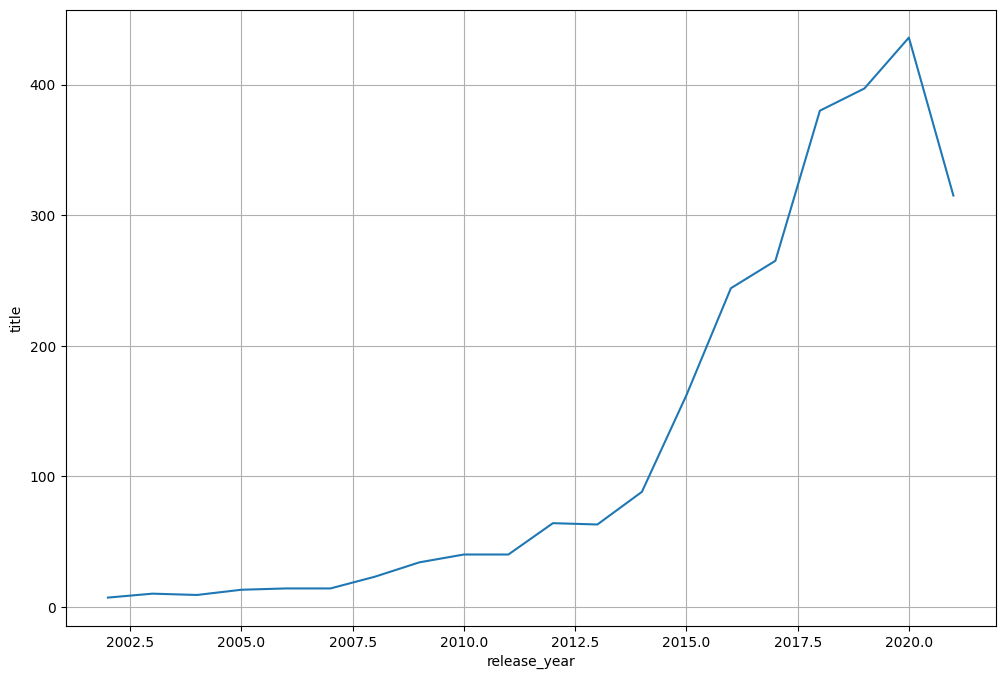

In [ ]:
plt.figure(figsize = (12,8))
sns.lineplot(x="release_year",y="title",data=df_sub_shows)
plt.grid()
plt.show()

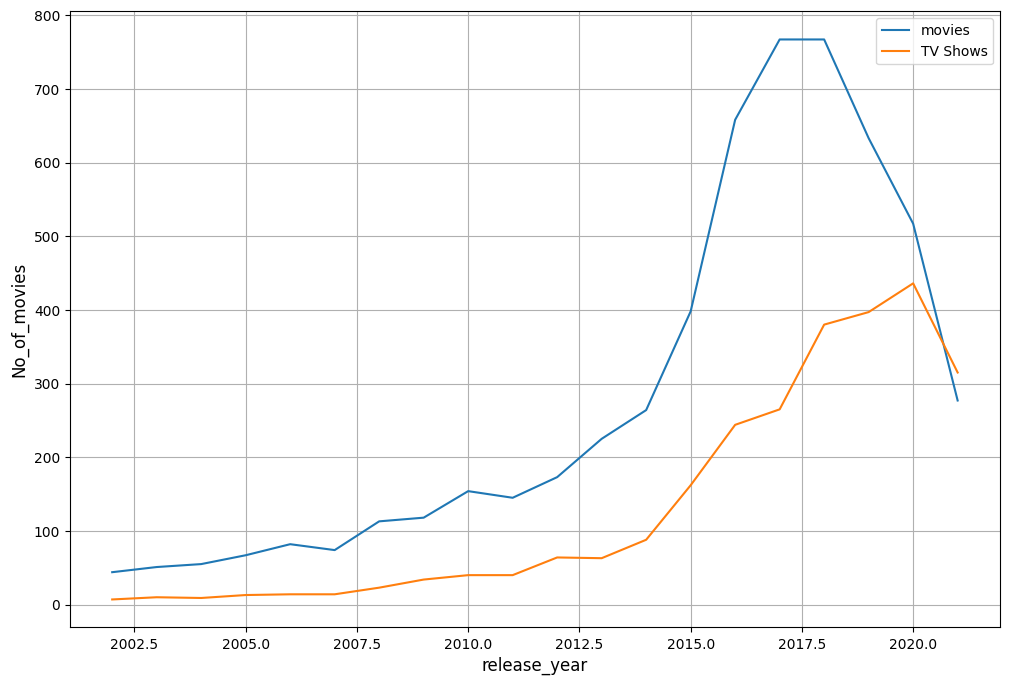

In [ ]:
plt.figure(figsize = (12,8))

game1 = "movies"
sns.lineplot(x="release_year",y="title",data=df_sub_movies,label=game1)
plt.xlabel("release_year",fontsize = 12)
plt.ylabel("No_of_movies",fontsize = 12)

game2 = "TV Shows"
sns.lineplot(x="release_year",y="title",data=df_sub_shows,label = game2)
plt.legend(loc="upper right")
plt.grid()
plt.show()

# ***Insights: ***

By observing the line plot we can conclude that movies are dominating over TV-Shows for many years. There is a gradual increase in TV-shows but a sudden increase in movies between 2015 to 2016 because in 2011 to 2018 people used to follow old tradition like watching only movies and not aware of TV shows ,there are very less TV shows were released comparing to Movies. One more reason is TV shows duration is long when comparing to movies so people preferred movies due to less duration. But in 2019 and 2020 there was rise in TV shows because due to covid effect and lockdown people got so much time to watch the TV shows this led to rise the demand for TV shows became high popular. But when people are turning out from movies to TV shows it led to decrease in movies after 2019 and 2020 both decreased .


# ***Recommendation:***

 Netflix need to focus on TV shows also which results in more profit due to its long duration of watching, we can observe that after 2019 and 2020 both decreased because people became busy after covid they are not spending too much time on the Netflix due to their other works but popularity for this online platforms is increasing so Netflix need to bring some new marketing stratagies for attracting the audios need to implement the discounts policy on yearly subscriptions and need to encourage the Referrals with cash bonuses . Investing money  on best IMDB rating movies and TV shows  rather than normal movies this will give the good results for increasing the memberships for Netflix platform


In [ ]:
df_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,January
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,January
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,January
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,January
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0,9.0,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0,5.0,Tuesday,January
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0,1.0,Tuesday,January
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0,9.0,Thursday,January
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0,12.0,Thursday,January


In [ ]:
df_shows.groupby("month_added")["title"].count().sort_values(ascending=False).reset_index()

,month_added,title
0,12.0,266
1,7.0,262
2,9.0,251
3,6.0,236
4,8.0,236
5,10.0,215
6,4.0,214
7,3.0,213
8,11.0,207
9,5.0,193


In [ ]:
df["month_name"] = pd.to_datetime(df["year_added"]).dt.month_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,month_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,Saturday,January
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,Friday,January
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,Friday,January
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,Friday,January
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,Friday,January


In [ ]:
df["director"].fillna("Unknown director",inplace=True)
df["cast"].fillna("Unknown cast",inplace=True)
df["country"].fillna("Unknown country",inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
import pandas as pd

df = pd.read_csv("/content/netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.groupby("cast")["title"].nunique().sort_values(ascending=False)

,title
cast,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
...,...
Chinmay Kambli,1
Kumiko Aso,1
Kumarakom Vasudevan,1


In [ ]:
x= df.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].index
x

Index(['Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani', 'Naseeruddin Shah',
       'Takahiro Sakurai', 'Rupa Bhimani', 'Akshay Kumar', 'Om Puri',
       'Yuki Kaji', 'Amitabh Bachchan'],
      dtype='object', name='cast')

In [ ]:
y = df.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].values
y

array([43, 35, 33, 32, 32, 31, 30, 30, 29, 28])

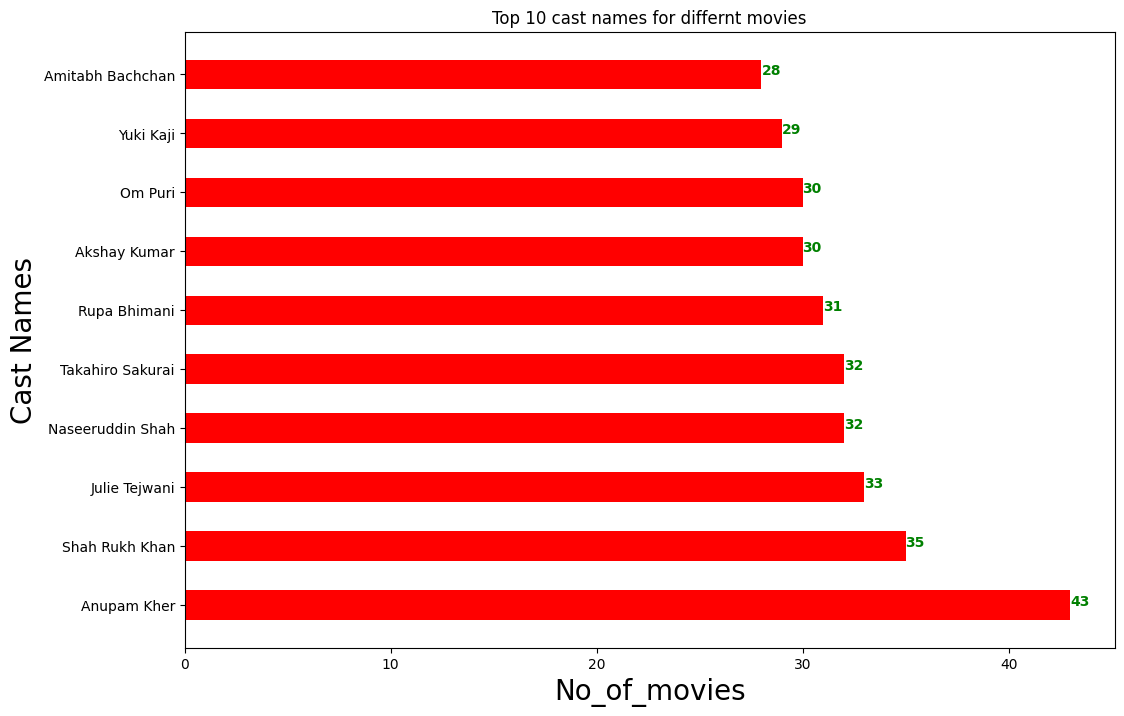

In [ ]:
x =  df.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].index
y =  df.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].values

fig,ax=plt.subplots(figsize = (12,8))
width = 0.50

ax.barh(x,y,width,color="red")
plt.title("Top 10 cast names for differnt movies")
plt.ylabel("Cast Names",fontsize = (20))
plt.xlabel("No_of_movies",fontsize = (20))

for i,v in enumerate(y):
  ax.text(v,i,str(v),color='green',fontweight = "bold")

plt.show()

# **Insights:**

when we observe the Top 10 cast names for different movies Anupam kher holds the first position with 43 movies and second position owned by Shah Rukh khan with 35 movies followed by Julie Tejwani and Naseeruddin shah with 33 movies and finally Amitab Bachchan holds 10th position  


# **Recommendations:**

Netflix need to focus on the famous cast movies which will result in attracting more number of customers to this platform. As we know that stardom plays a key role in watching a movie example it want to watch any movie first we will look the famous cast names in that particular movie many factors we will consider at first we will look whether our loved hero or heroine acted or casted in this movie or not. If we see Shah Rukh Khan is very famous actor if we take his movies failure percentage is very less when comparing to others. This strategy will help in increasing the Netflix profit


In [ ]:
df_sh1 = df[df["type"] == "TV Show"]
df_sh1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,Samina Peerzada,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,Waseem Abbas,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,Javed Sheikh,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,Hina Khawaja Bayat,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
df_sh1.groupby("cast")["title"].nunique().sort_values(ascending=False)

,title
cast,
Takahiro Sakurai,25
Yuki Kaji,19
Junichi Suwabe,17
Daisuke Ono,17
Ai Kayano,17
...,...
Ivy Yin,1
Iván Pellicer,1
Iván Álvarez de Araya,1


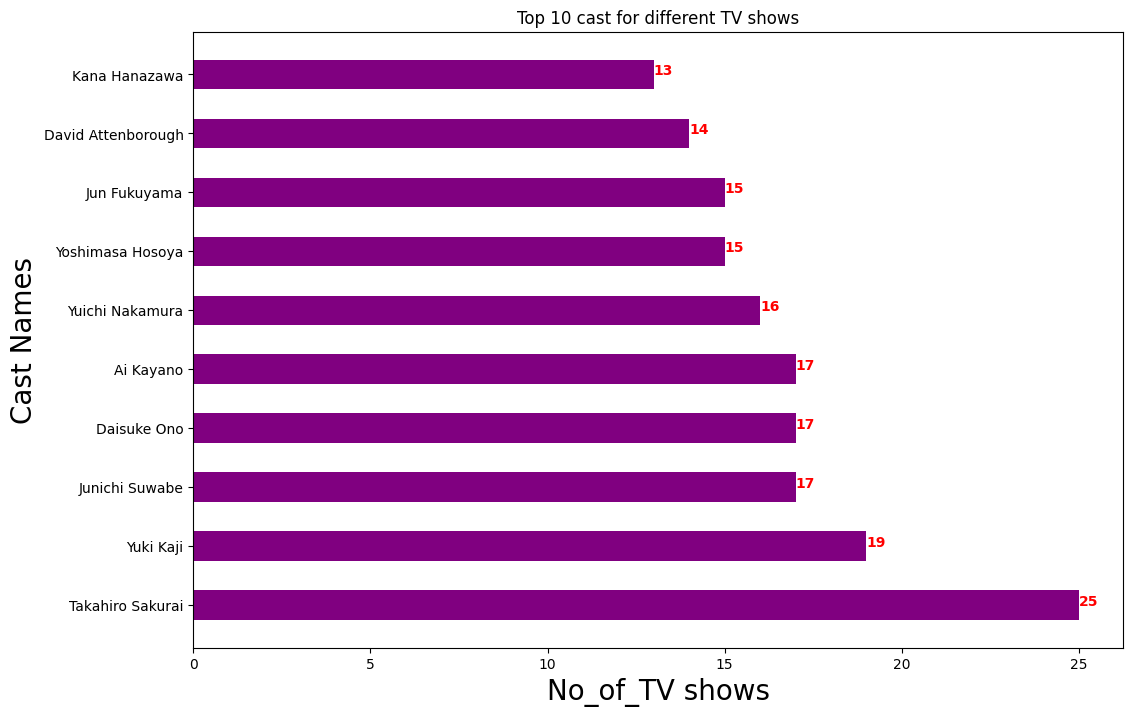

In [ ]:
x =  df_sh1.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].index
y =  df_sh1.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].values

fig,ax=plt.subplots(figsize = (12,8))
width = 0.50

ax.barh(x,y,width,color="purple")
plt.title("Top 10 cast for different TV shows")
plt.ylabel("Cast Names",fontsize = (20))
plt.xlabel("No_of_TV shows",fontsize = (20))

for i,v in enumerate(y):
  ax.text(v,i,str(v),color='red',fontweight = "bold")

plt.show()

# **Insights: **

we move to the Tv shows Takahiro Sakurai holds the first position with 25 shows followed by yuki kaji with 19 shows  and Junichi suwabe with 17 shows , Daisuke Ono with 17 shows Ai Kayano with 17 ,Yaichi Nakamura with 16, Yoshimasa with 15 shows many more


## Recommendations: **bold text**

 Netflix need to focus on the famous cast shows which will result in attracting more number of customers to this platform. As we know that stardom plays a key role in watching a movie example it want to watch any show first we will look the famous cast names in that particular movie many factors we will consider at first we will look whether our loved hero or heroine acted or casted in this movie or not. If we see Takahiro Sakurai is very famous actor if we take his shows failure percentage is very less when comparing to others. This strategy will help in increasing the Netflix profit


In [ ]:
df_mov1 = df[df["type"] == "Movie"]
df_mov1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')


recent_years = df[df['release_year'] >= 2015]

content_type_count = recent_years['type'].value_counts()

content_type_count

,count
type,
Movie,37575
TV Show,19778


In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'])


recent_years = df[df['release_year'] >= 2015]


type_of_content = recent_years['type'].value_counts()

type_of_content

,count
type,
Movie,37575
TV Show,19778


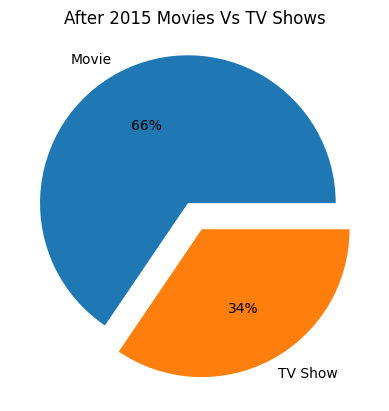

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(type_of_content,
        labels = type_of_content.index,
        autopct = "%.f%%",
        explode = [0.1,0.1]
      )
plt.title("After 2015 Movies Vs TV Shows")
plt.show()

In [ ]:
df['release_year'] = pd.to_numeric(df['release_year'])


recent_years = df[df['release_year'] >= 2018]


type_of_content = recent_years['type'].value_counts()

type_of_content

,count
type,
Movie,19605
TV Show,14156


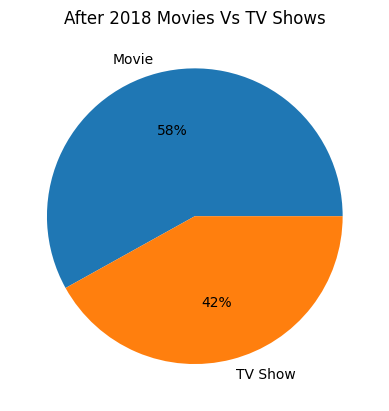

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(type_of_content,
        labels = type_of_content.index,
        autopct = "%.f%%"
      )
plt.title("After 2018 Movies Vs TV Shows")
plt.show()

# **Insights: **

By observing  above data Netflix has more focus on TV Shows rather than movies. By taking the above pie charts into considerations, after 2015 piechat shows 66 % movies and 34% TV shows but when it comes to after 2018 years movies decreased to 58% and TV shows increased to 42% with above data. So it is clear that Netflix is more focusing on TV shows rather than movies.


# Recommendation: **bold text**

Actually TV Shows take long duration when comparing to the movies ,some of the TV shows doesn’t end in single season it will take 4 to 5 seasons to complete a one TV Show. One thing we need to notice here is even though TV shows duration is long now a days audios are prefer watching TV Shows because of they look interesting and crime thriller these attract more and more audios . If duration is long for particular TV Show in order to complete a that show audios will extend their memberships by paying extra money which makes profit business for Netflix. All seasons will not release at a single time this will built curiosity towards TV shows encouraging TV show will certainly benefits for the Netflix


In [ ]:
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#replacing country names in shortformat
df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK','South Korea':'S korea'})
df_movie

In [ ]:
df_movie1 = df[df["type"]== "Movie"]
df_movie1 = df_movie1.groupby("country")["title"].nunique().sort_values(ascending=False).reset_index().loc[:10]
df_movie1


,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


In [ ]:
df_movie = df1[df1['type'] == 'Movie']
df_movie = df_movie.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:10]

#dropping unknown country column
df_movie = df_movie.drop(3)

#replacing country names in shortformat
df_movie['country'] = df_movie['country'].replace({'United States':'USA','United Kingdom':'UK'})
df_movie

In [ ]:
x =  df_sh1.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].index
y =  df_sh1.groupby("cast")["title"].nunique().sort_values(ascending=False)[:10].values

In [ ]:
df_movie1 = df[df["type"]== "Movie"]
df_movie1 = df_movie1.groupby("country")["title"].nunique().sort_values(ascending=False)[:10]
df_movie1

,title
country,
United States,2751
India,962
United Kingdom,532
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


In [ ]:
df_shows1 = df[df["type"]== "TV Show"]
df_shows1 = df_shows1.groupby("country")["title"].nunique().sort_values(ascending=False)[:10]
df_shows1

,title
country,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


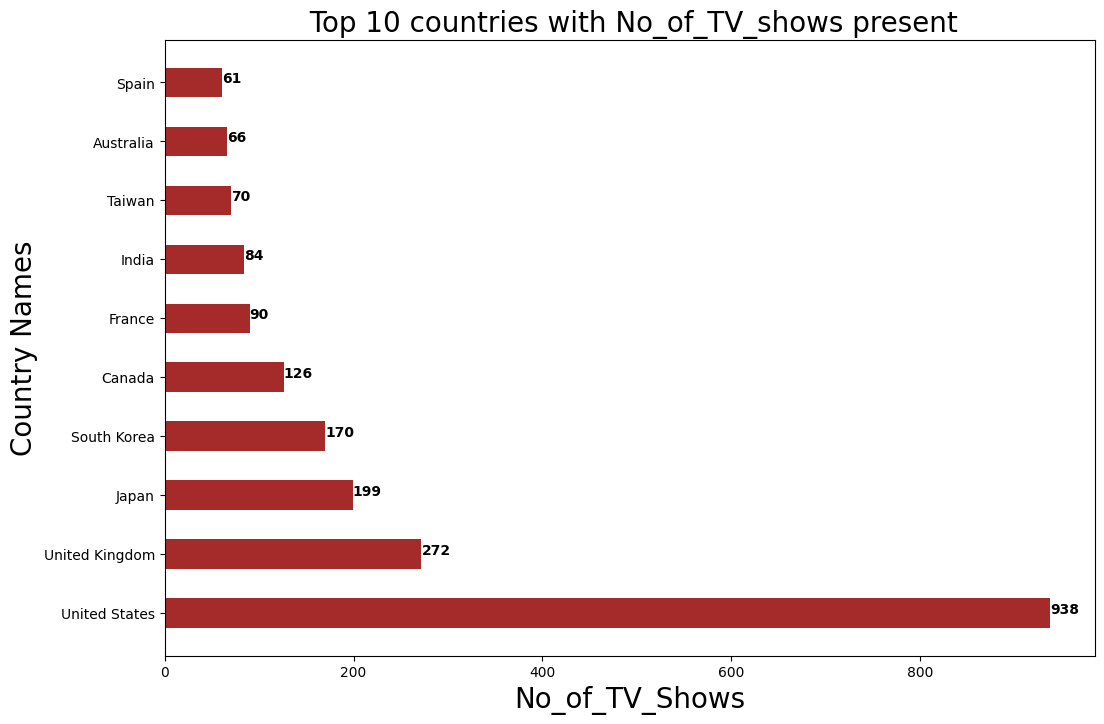

In [ ]:
x =  df_shows1.index
y =  df_shows1.values

fig,ax=plt.subplots(figsize = (12,8))
width = 0.50

ax.barh(x,y,width,color="brown")
plt.title(" Top 10 countries with No_of_TV_shows present",fontsize = (20))
plt.ylabel("Country Names",fontsize = (20))
plt.xlabel("No_of_TV_Shows",fontsize = (20))

for i,v in enumerate(y):
  ax.text(v,i,str(v),color='black',fontweight = "bold")

plt.show()

# **Insights: **

By observing the above data united states holds the top position with 938 TV Shows followed by united kingdom with 272 TV shows the gap between first position and second position is almost 4 times and Japan secured third position with 199 and south Korea with 170 and India is at seventh position other counties are less than 100 Tv shows .


# Recommendations: **bold text**

We can conclude that United country plays a vital role on Netflix platform because it was founded by American guys called Reed Hastings and Marc Randolph in Scotts Valley, California. Apart from United states Netflix is also growing in India in recent years. So it should focus more on India because due to its large population. Netflix can expect more and more audios in coming years from India but it should take care of some steps like maintaining minimal subscription price rates in India comparing to other countries. By understanding the nature of audios mindset Netflix should implement there plans in a proper way which can produce amazing results and good profits.


In [ ]:
import pandas as pd

df = pd.read_csv("/content/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df["director"] = df["director"].str.split(", ")
df["cast"] = df["cast"].str.split(", ")
df["country"] = df["country"].str.split(", ")

df = df.explode(['director'])
df = df.explode(['cast'])
df = df.explode(['country'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.shape

(89382, 12)

In [ ]:
df['date_added'] = pd.to_datetime((df['date_added']))

df['Month'] = df['date_added'].dt.month
# Assuming 'tv_shows' is your DataFrame

tv_shows = df.query('type == "TV Show"')
# Assuming 'movies' is your DataFrame
movies = df.query('type == "Movie"')

tv_shows_monthly = tv_shows.groupby('Month')['show_id'].count()

movies_monthly = movies.groupby('Month')['show_id'].count()

best_tv_shows_month = tv_shows_monthly.idxmax()
best_movies_month = movies_monthly.idxmax()



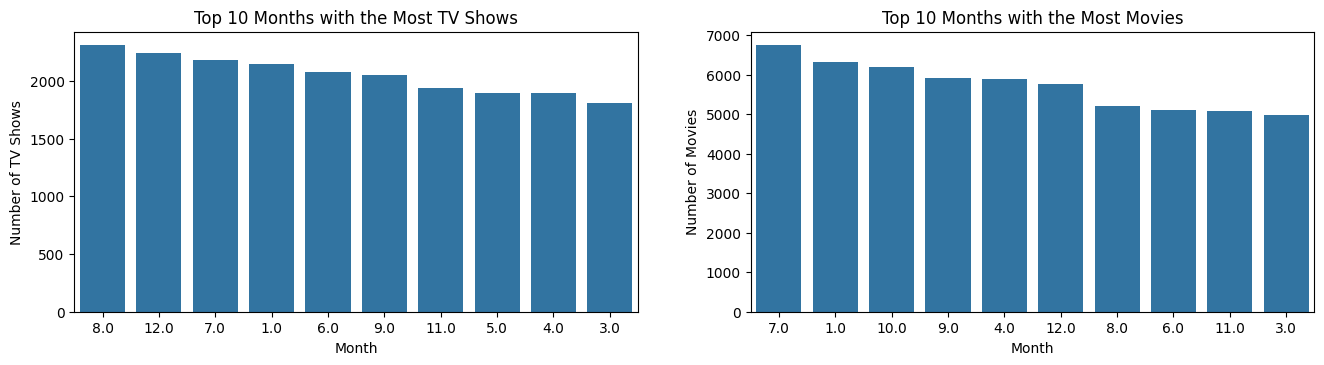

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tv_shows_monthly = tv_shows_monthly.sort_values(ascending=False).iloc[:10]
movies_monthly = movies_monthly.sort_values(ascending=False).iloc[:10]
plt.figure(figsize = (16,8))


plt.subplot(2,2,1)
sns.barplot(x=tv_shows_monthly.index,y=tv_shows_monthly.values,order=tv_shows_monthly.index)
plt.title('Top 10 Months with the Most TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')


plt.subplot(2,2,2)
sns.barplot(x=movies_monthly.index,y=movies_monthly.values,order=movies_monthly.index)
plt.title('Top 10 Months with the Most Movies')

plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

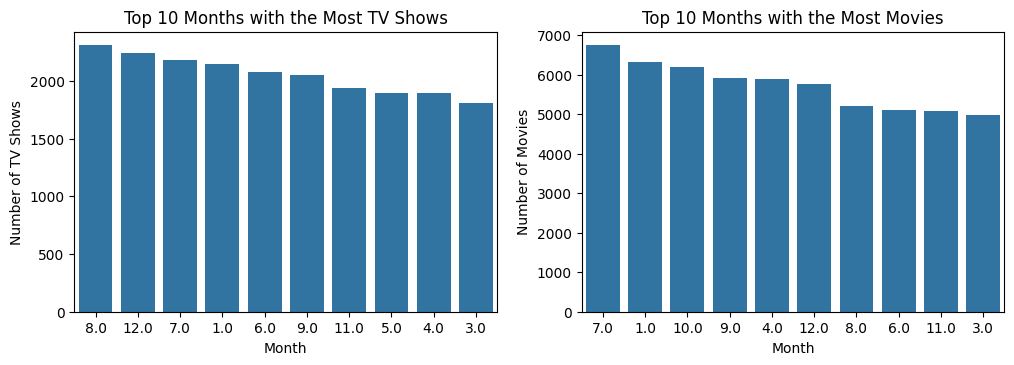

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tv_shows_monthly = tv_shows_monthly.sort_values(ascending=False).iloc[:10]
movies_monthly = movies_monthly.sort_values(ascending=False).iloc[:10]
plt.figure(figsize = (12,8))

# Create a count plot directly from the DataFrame
plt.subplot(2,2,1)
sns.barplot(x=tv_shows_monthly.index,y=tv_shows_monthly.values,order=tv_shows_monthly.index)
plt.title('Top 10 Months with the Most TV Shows')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')

# Create a count plot directly from the DataFrame
plt.subplot(2,2,2)
sns.barplot(x=movies_monthly.index,y=movies_monthly.values,order=movies_monthly.index)
plt.title('Top 10 Months with the Most Movies')

plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

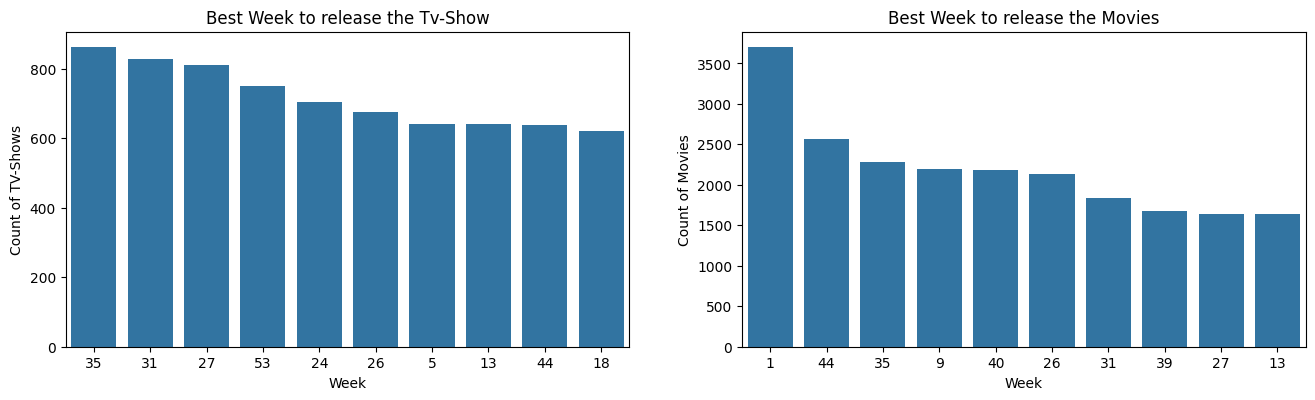

In [ ]:
tv_shows_weekly = tv_shows_weekly.sort_values(ascending=False).iloc[:10]
movies_weekly = movies_weekly.sort_values(ascending=False).iloc[:10]


plt.figure(figsize = (16,9))
plt.subplot(2,2,1)
sns.barplot(x=tv_shows_weekly.index,y=tv_shows_weekly.values,order=tv_shows_weekly.index)

plt.title('Best Week to release the Tv-Show')
plt.xlabel('Week')
plt.ylabel('Count of TV-Shows')
plt.subplot(2,2,2)

sns.barplot(x=movies_weekly.index,y=movies_weekly.values,order=movies_weekly.index)

plt.title('Best Week to release the Movies')
plt.xlabel('Week')
plt.ylabel('Count of Movies')
plt.show()


# **   Insights **

**Best time for TV Shows:** The analysis suggests that the best time to launch a TV show on Netflix is during the 27th week of the year. Additionally, the month of December stands out as a favourable period for TV show releases.

Best time for Movies: For movies, the best week to launch is the 1st week of the year, and the best month is July. These specific weeks and months are identified as peak times for movie releases. Movies are prominently released in weeks falling in July, early October, late February to early March, late June to early July, and late August to early September. This pattern suggests that movie production peaks around the beginning of summer, early fall, and late winter/early spring periods. Recommendations: Strategic Content Release: Plan content releases strategically based on insights about the best months for TV shows and movies. Aligning releases with peak months can maximize viewership and engagement. Promotions and Marketing: Implement marketing and promotional activities during the identified peak months to enhance visibility and attract a larger audience. Consider special campaigns or collaborations to boost content awareness

# **Recommendations: **

**Strategic Content Release:** Plan content releases strategically based on insights about the best months for TV shows and movies. Aligning releases with peak months can maximize viewership and engagement. Promotions and Marketing: Implement marketing and promotional activities during the identified peak months to enhance visibility and attract a larger audience. Consider special campaigns or collaborations to boost content awareness.

Marketing Strategies: Implement engagement strategies, such as interactive features, social media campaigns, or live events, during the identified best months and days. This can enhance the overall viewer experience. Continuous Monitoring: Regularly monitor viewership trends and update release strategies based on evolving audience preferences. Keep track of changing patterns to stay adaptable and responsive.

Collaboration Opportunities: Explore collaboration opportunities with influencers, other content creators, or events during the best months. Collaborative efforts can amplify the reach and impact of content releases. By incorporating these recommendations, Netflix can optimize its content release strategy, improve audience engagement, and maintain a dynamic and successful platform throughout the year.


In [ ]:
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'



In [ ]:
df.rename(columns = {"movie_rating": "rating"},inplace=True)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,38
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38


In [ ]:
df_sub = df["rating"].apply(age_group)
df_sub

,rating
0,Teens
1,Adults
1,Adults
1,Adults
1,Adults
...,...
8806,Teens
8806,Teens
8806,Teens
8806,Teens


In [ ]:
df["content_type"] = df["rating"].apply(age_group)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Week,content_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,38,Teens
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38,Adults
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38,Adults
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38,Adults
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,38,Adults


In [ ]:
df["content_type"].value_counts()


,count
content_type,
Adults,43529
Teens,25251
Older Kids,15650
Little Kids,4952


In [ ]:
def age_group(x):
    if x in ['TV-Y', 'TV-G', 'G']:
        return 'Little Kids'
    elif x in ['TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG']:
        return 'Older Kids'
    elif x in ['PG-13','TV-14']:
        return 'Teens'
    else:
        return 'Adults'


df_sub1 = df["content_type"].value_counts()
df_sub1

,count
content_type,
Adults,43529
Teens,25251
Older Kids,15650
Little Kids,4952


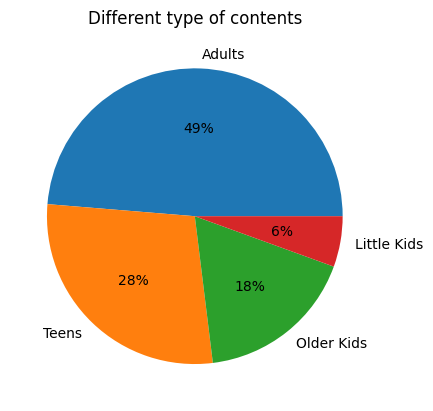

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.pie(df_sub1,
        labels = df_sub1.index,
        autopct = "%.f%%"
      )
plt.title("Different type of contents")
plt.show()

# **Insights:**
By observing the above data adult type of content is dominating on Netflix when comparing to the other types. Almost half type of content is related to adults and followed by teens content with 28 percentage, older kids with 18 percentage least is 6 percentage content is related to Little kids

# **Recommendations:**
Netflix need to focus on Adult type of content where most of audios or viewers are belong to adults category. According to some analysis they prefer adults type of content and Horror movies this belong to adult category. When it comes to Teens category they prefer love and romantic type of movies and shows they may also like horrors movies and shows. Few older watch normal type of content like action thriller movies and shows little kids category prefer anime movies and kids type of animation movies and TV shows . Netflix need to their marketing by taking the above points into considerations which helps in better results.
